In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2024 election data set
pc_24 = pd.read_excel(r"C:\Users\samir\Desktop\my_data\election_data\pc_24.xls",skiprows=2,skipfooter=7)

pc_24

,State Name,PC Name,Candidate Name,Gender,Age,Category,Party Name,Party Symbol,Total Votes Polled In\nThe Constituency,Valid Votes,General,Postal,Total,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Over Total Valid Votes Polled In Constituency,Total Electors
0,Andhra Pradesh,Araku,GUMMA THANUJA RANI,FEMALE,31.0,ST,YSRCP,Ceiling fan,1165787,1113975,471470,5535,477005,30.63,40.92,42.82,1557153
1,Andhra Pradesh,Araku,KOTHAPALLI GEETHA,FEMALE,53.0,ST,BJP,Lotus,1165787,1113975,417113,9312,426425,27.38,36.58,38.28,1557153
2,Andhra Pradesh,Araku,APPALANARASA PACHIPENTA,MALE,41.0,ST,CPI(M),"Hammer, Sickle and Star",1165787,1113975,119016,4113,123129,7.91,10.56,11.05,1557153
3,Andhra Pradesh,Araku,NOTA,NaN,NaN,NaN,NOTA,NOTA,1165787,1113975,50205,265,50470,3.24,4.33,4.53,1557153
4,Andhra Pradesh,Araku,AVASHYA LAHARI . VARAM,FEMALE,30.0,ST,BSP,Elephant,1165787,1113975,24858,892,25750,1.65,2.21,2.31,1557153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,Jammu and Kashmir,JAMMU,QARI ZAHEER ABBAS BHATTI,MALE,52.0,GENERAL,AIFB,Lion,1309825,1297531,983,1,984,0.05,0.08,0.08,1818657
8897,Ladakh,Ladakh,MOHMAD HANEEFA,MALE,55.0,ST,IND,Kettle,135662,134612,64443,816,65259,34.24,48.10,48.48,190576
8898,Ladakh,Ladakh,TSERING NAMGYAL,MALE,51.0,ST,INC,Hand,135662,134612,35770,1627,37397,19.62,27.57,27.78,190576
8899,Ladakh,Ladakh,TASHI GYALSON,MALE,48.0,ST,BJP,Lotus,135662,134612,31505,451,31956,16.77,23.56,23.74,190576


In [4]:
pc_24.columns

Index(['State Name', 'PC Name', 'Candidate Name', 'Gender', 'Age', 'Category',
       'Party Name', 'Party Symbol', 'Total Votes Polled In\nThe Constituency',
       'Valid Votes', 'General', 'Postal', 'Total',
       'Over Total Electors In Constituency',
       'Over Total Votes Polled In Constituency',
       'Over Total Valid Votes Polled In Constituency', 'Total Electors'],
      dtype='object')

In [5]:
pc_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   State Name                                     8901 non-null   object 
 1   PC Name                                        8901 non-null   object 
 2   Candidate Name                                 8901 non-null   object 
 3   Gender                                         8359 non-null   object 
 4   Age                                            8359 non-null   float64
 5   Category                                       8359 non-null   object 
 6   Party Name                                     8901 non-null   object 
 7   Party Symbol                                   8901 non-null   object 
 8   Total Votes Polled In
The Constituency         8901 non-null   int64  
 9   Valid Votes                                    8901 

In [6]:
pc_24.columns = pc_24.columns.str.strip().str.lower() # handling white space and lowering the column names

pc_24.columns

Index(['state name', 'pc name', 'candidate name', 'gender', 'age', 'category',
       'party name', 'party symbol', 'total votes polled in\nthe constituency',
       'valid votes', 'general', 'postal', 'total',
       'over total electors in constituency',
       'over total votes polled in constituency',
       'over total valid votes polled in constituency', 'total electors'],
      dtype='object')

In [7]:
pc_24.columns = pc_24.columns.str.replace(' ','_')

pc_24.columns

Index(['state_name', 'pc_name', 'candidate_name', 'gender', 'age', 'category',
       'party_name', 'party_symbol', 'total_votes_polled_in\nthe_constituency',
       'valid_votes', 'general', 'postal', 'total',
       'over_total_electors_in_constituency',
       'over_total_votes_polled_in_constituency',
       'over_total_valid_votes_polled_in_constituency', 'total_electors'],
      dtype='object')

In [8]:
pc_24.isna().sum() # pc Surat is not in the data sets

state_name                                         0
pc_name                                            0
candidate_name                                     0
gender                                           542
age                                              542
category                                         542
party_name                                         0
party_symbol                                       0
total_votes_polled_in\nthe_constituency            0
valid_votes                                        0
general                                            0
postal                                             0
total                                              0
over_total_electors_in_constituency                0
over_total_votes_polled_in_constituency            0
over_total_valid_votes_polled_in_constituency      0
total_electors                                     0
dtype: int64

In [9]:
pc_24[pc_24.isna().any(axis=1)] # null values are related to NOTA

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors
3,Andhra Pradesh,Araku,NOTA,NaN,NaN,NaN,NOTA,NOTA,1165787,1113975,50205,265,50470,3.24,4.33,4.53,1557153
16,Andhra Pradesh,Srikakulam,NOTA,NaN,NaN,NaN,NOTA,NOTA,1241169,1211081,24498,107,24605,1.49,1.98,2.03,1646686
30,Andhra Pradesh,Vizianagaram,NOTA,NaN,NaN,NaN,NOTA,NOTA,1307632,1275992,23097,153,23250,1.46,1.78,1.82,1590994
49,Andhra Pradesh,Visakhapatnam,NOTA,NaN,NaN,NaN,NOTA,NOTA,1391130,1381812,5171,142,5313,0.28,0.38,0.38,1931398
80,Andhra Pradesh,Anakapalle,NOTA,NaN,NaN,NaN,NOTA,NOTA,1328726,1299097,26084,151,26235,1.64,1.97,2.02,1601365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,Jammu and Kashmir,SRINAGAR,NOTA,NaN,NaN,NaN,NOTA,NOTA,676408,669244,5887,111,5998,0.34,0.89,0.90,1748803
8851,Jammu and Kashmir,ANANTNAG-RAJOURI,NOTA,NaN,NaN,NaN,NOTA,NOTA,1026420,1019925,5967,256,6223,0.34,0.61,0.61,1849517
8864,Jammu and Kashmir,UDHAMPUR,NOTA,NaN,NaN,NaN,NOTA,NOTA,1115491,1100789,12891,47,12938,0.79,1.16,1.18,1640846
8878,Jammu and Kashmir,JAMMU,NOTA,NaN,NaN,NaN,NOTA,NOTA,1309825,1297531,4631,14,4645,0.26,0.35,0.36,1818657


In [10]:
pc_24['state_name'] = pc_24['state_name'].str.strip().str.title() # standardisation, diamention columns

In [11]:
pc_24['pc_name'] = pc_24['pc_name'].str.strip().str.title()

In [12]:
pc_24['gender'] = pc_24['gender'].str.strip().str.title()

In [13]:
pc_24['party_name'] = pc_24['party_name'].str.strip().str.upper()

In [14]:
pc_24['party_symbol'] = pc_24['party_symbol'].str.strip().str.title()

In [15]:
pc_24['candidate_name'] = pc_24['candidate_name'].str.strip().str.title()

In [16]:
# Summary statistics of diamentions

pc_24[['state_name','pc_name','candidate_name','gender','category','party_name','party_symbol']].describe()

,state_name,pc_name,candidate_name,gender,category,party_name,party_symbol
count,8901,8901,8901,8359,8359,8901,8901
unique,36,539,8099,3,4,745,231
top,Maharashtra,Karur,Nota,Male,GENERAL,IND,Nota
freq,1169,55,542,7553,5265,3921,542


In [17]:
# checking required diamentions

In [18]:
pc_24['state_name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'West Bengal',
       'Chhattisgarh', 'Jharkhand', 'Uttarakhand', 'Telangana',
       'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli And Daman & Diu', 'Nct Of Delhi',
       'Lakshadweep', 'Puducherry', 'Jammu And Kashmir', 'Ladakh'],
      dtype=object)

In [19]:
pc_24['state_name'].nunique()

36

In [20]:
pc_24['pc_name'].nunique() # denotes there are same pc name under states

539

In [21]:
pc_24['category'].unique() # this is not pc category, this belongs to candidate

array(['ST', nan, 'GENERAL', 'SC', 'BL'], dtype=object)

In [22]:
pc_24['party_name'].unique()

array(['YSRCP', 'BJP', 'CPI(M)', 'NOTA', 'BSP', 'IND', 'JBNP',
       'BHRTADVSIP', 'TLRDSMTP', 'IPBP', 'TDP', 'INC', 'BCYP', 'NRCP',
       'PPOI', 'YGATLSIP', 'NBBHNRSVP', 'JRBP', 'SP', 'PRSHP', 'RPC(S)',
       'RPI(A)', 'DABAP', 'BRRTD', 'PRJPP', 'JMBP', 'NAVAP', 'JNP',
       'JJSP', 'CPI(ML)(L)', 'TLGUNGP', 'RPI', 'LBCP', 'RPPRINAT', 'PPID',
       'ARPS', 'BHRJWNKP', 'AIFB', 'SUCI', 'ALLJP', 'CPI', 'JNSHSK',
       'BNGLRNNP', 'NPT', 'VCK', 'APRS', 'LJD', 'MCPI', 'ILP(AP)', 'ALPP',
       'RSP', 'JCVIVP', 'NNKP', 'SDPI', 'AYSRCP', 'NETHNP', 'AINDKSJNTP',
       'BYPP', 'CHALP', 'RRS', 'RPIA', 'JAC', 'AHNP', 'URPI', 'IBP',
       'JHUP', 'ANC', 'NMSP', 'GNASURKP', 'ANCHDMCP', 'UPPL', 'BOPF',
       'AITC', 'VPI', 'AIUDF', 'AGP', 'BGANP', 'TNRMPI', 'HSP', 'AJM',
       'RUC', 'ESBD', 'BAHUMP', 'ASDC', 'BNGNBNRMS', 'JPJD', 'AAAP',
       'ASMJTYP', 'JD(U)', 'RJD', 'ASPKR', 'VKVIP', 'VSIP', 'RJBP',
       'PRCP', 'BHRTSP', 'AIMIM', 'SAP', 'SMJSKTP', 'BJKVP', 'PBLBRP',
       'DJHP',

In [23]:
pc_24['party_name'].nunique()

745

In [24]:
pc_24.info() # measures are not object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   state_name                                     8901 non-null   object 
 1   pc_name                                        8901 non-null   object 
 2   candidate_name                                 8901 non-null   object 
 3   gender                                         8359 non-null   object 
 4   age                                            8359 non-null   float64
 5   category                                       8359 non-null   object 
 6   party_name                                     8901 non-null   object 
 7   party_symbol                                   8901 non-null   object 
 8   total_votes_polled_in
the_constituency         8901 non-null   int64  
 9   valid_votes                                    8901 

In [25]:
pc_24.columns

Index(['state_name', 'pc_name', 'candidate_name', 'gender', 'age', 'category',
       'party_name', 'party_symbol', 'total_votes_polled_in\nthe_constituency',
       'valid_votes', 'general', 'postal', 'total',
       'over_total_electors_in_constituency',
       'over_total_votes_polled_in_constituency',
       'over_total_valid_votes_polled_in_constituency', 'total_electors'],
      dtype='object')

In [26]:
# need to generate rank by pc

pc_24['rank'] =  pc_24.groupby(['state_name','pc_name'])['total'].rank(method = 'min',ascending = False)

In [27]:
pc_24[pc_24['pc_name']=='Sreerampur'] # random checking

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank
7283,West Bengal,Sreerampur,Kalyan Banerjee,Male,67.0,GENERAL,AITC,Flowers And Grass,1477130,1461498,671865,2105,673970,34.95,45.63,46.12,1928256,1.0
7284,West Bengal,Sreerampur,Kabir Shankar Bose,Male,40.0,GENERAL,BJP,Lotus,1477130,1461498,497720,1420,499140,25.89,33.79,34.15,1928256,2.0
7285,West Bengal,Sreerampur,Dipsita Dhar,Female,30.0,GENERAL,CPI(M),"Hammer, Sickle And Star",1477130,1461498,238131,1015,239146,12.40,16.19,16.36,1928256,3.0
7286,West Bengal,Sreerampur,Sahariar Mullick (Bapi),Male,53.0,GENERAL,AISF,Envelope,1477130,1461498,25659,18,25677,1.33,1.74,1.76,1928256,4.0
7287,West Bengal,Sreerampur,Nota,NaN,NaN,NaN,NOTA,Nota,1477130,1461498,14964,70,15034,0.78,1.02,1.03,1928256,5.0
7288,West Bengal,Sreerampur,Sundar Patra,Male,57.0,SC,IND,Batsman,1477130,1461498,9897,5,9902,0.51,0.67,0.68,1928256,6.0
7289,West Bengal,Sreerampur,Sasanka Chakraborty,Male,38.0,GENERAL,IND,Apple,1477130,1461498,3933,5,3938,0.20,0.27,0.27,1928256,7.0
7290,West Bengal,Sreerampur,Supriya Biswas,Female,41.0,SC,BSP,Elephant,1477130,1461498,3572,17,3589,0.19,0.24,0.25,1928256,8.0
7291,West Bengal,Sreerampur,Kalyan Paul,Male,45.0,GENERAL,IND,Coconut Farm,1477130,1461498,1749,9,1758,0.09,0.12,0.12,1928256,9.0
7292,West Bengal,Sreerampur,Pradyut Chowdhuri,Male,70.0,GENERAL,SUCI,Battery Torch,1477130,1461498,1671,9,1680,0.09,0.11,0.11,1928256,10.0


In [28]:
pc_24[pc_24['pc_name']=='Kota'] # random check

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank
4925,Rajasthan,Kota,Om Birla,Male,62.0,GENERAL,BJP,Lotus,1500959,1489896,744396,6100,750496,35.93,50.00,50.37,2088853,1.0
4926,Rajasthan,Kota,Prahlad Gunjal,Male,56.0,GENERAL,INC,Hand,1500959,1489896,702623,5899,708522,33.92,47.20,47.56,2088853,2.0
4927,Rajasthan,Kota,Nota,NaN,NaN,NaN,NOTA,Nota,1500959,1489896,10176,85,10261,0.49,0.68,0.69,2088853,3.0
4928,Rajasthan,Kota,Dhanraj Yadav,Male,35.0,SC,BSP,Elephant,1500959,1489896,7547,28,7575,0.36,0.50,0.51,2088853,4.0
4929,Rajasthan,Kota,Ashish Yogi,Male,29.0,GENERAL,ESBD,Diamond,1500959,1489896,5756,19,5775,0.28,0.38,0.39,2088853,5.0
4930,Rajasthan,Kota,Lakshmichand,Male,58.0,GENERAL,IND,Balloon,1500959,1489896,3890,2,3892,0.19,0.26,0.26,2088853,6.0
4931,Rajasthan,Kota,Satyendra Kumar Jain,Male,55.0,GENERAL,IND,Sitar,1500959,1489896,2520,1,2521,0.12,0.17,0.17,2088853,7.0
4932,Rajasthan,Kota,Ramnath Mehra,Male,65.0,SC,IND,Almirah,1500959,1489896,2407,15,2422,0.12,0.16,0.16,2088853,8.0
4933,Rajasthan,Kota,Moinuddin,Male,35.0,GENERAL,IND,Iron,1500959,1489896,1854,6,1860,0.09,0.12,0.12,2088853,9.0
4934,Rajasthan,Kota,Bhanwar Kumar Rawal,Male,40.0,SC,IND,Flute,1500959,1489896,1102,29,1131,0.05,0.08,0.08,2088853,10.0


In [29]:
pd.options.display.max_rows = 500

In [30]:
pc_24[['pc_name','party_symbol','total','rank']].head(200)

,pc_name,party_symbol,total,rank
0,Araku,Ceiling Fan,477005,1.0
1,Araku,Lotus,426425,2.0
2,Araku,"Hammer, Sickle And Star",123129,3.0
3,Araku,Nota,50470,4.0
4,Araku,Elephant,25750,5.0
5,Araku,Gas Cylinder,9535,6.0
6,Araku,Bat,9462,7.0
7,Araku,Plate Containing Food,8136,8.0
8,Araku,Battery Torch,7252,9.0
9,Araku,Hockey And Ball,6766,10.0


In [31]:
pc_24 = pc_24.sort_values(by=['state_name','pc_name','rank']) # sorting needed to calculate margin difference

pc_24.head()

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank
8544,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Bishnu Pada Ray,Male,73.0,GENERAL,BJP,Lotus,202597,200705,102182,254,102436,32.44,50.56,51.04,315745,1.0
8545,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Kuldeep Rai Sharma,Male,56.0,GENERAL,INC,Hand,202597,200705,77829,211,78040,24.72,38.52,38.88,315745,2.0
8546,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Manoj Paul,Male,35.0,GENERAL,ANDC,Coconut Farm,202597,200705,8236,18,8254,2.61,4.07,4.11,315745,3.0
8547,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D Ayyappan,Male,60.0,GENERAL,CPI(M),"Hammer, Sickle And Star",202597,200705,6009,8,6017,1.91,2.97,3.00,315745,4.0
8548,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. Abdul Aziz,Male,42.0,GENERAL,IND,Chakki,202597,200705,2195,8,2203,0.70,1.09,1.10,315745,5.0


In [32]:
pc_24['margin_difference'] = abs(pc_24.groupby(['state_name','pc_name'])['total'].diff())

pc_24

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference
8544,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Bishnu Pada Ray,Male,73.0,GENERAL,BJP,Lotus,202597,200705,102182,254,102436,32.44,50.56,51.04,315745,1.0,NaN
8545,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Kuldeep Rai Sharma,Male,56.0,GENERAL,INC,Hand,202597,200705,77829,211,78040,24.72,38.52,38.88,315745,2.0,24396.0
8546,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Manoj Paul,Male,35.0,GENERAL,ANDC,Coconut Farm,202597,200705,8236,18,8254,2.61,4.07,4.11,315745,3.0,69786.0
8547,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D Ayyappan,Male,60.0,GENERAL,CPI(M),"Hammer, Sickle And Star",202597,200705,6009,8,6017,1.91,2.97,3.00,315745,4.0,2237.0
8548,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. Abdul Aziz,Male,42.0,GENERAL,IND,Chakki,202597,200705,2195,8,2203,0.70,1.09,1.10,315745,5.0,3814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,West Bengal,Uluberia,Bimalesh Kumar Hela,Male,45.0,SC,BSP,Elephant,1394157,1379476,4867,8,4875,0.28,0.35,0.35,1742388,9.0,229.0
7279,West Bengal,Uluberia,Sk. Sapiyar Ali,Male,41.0,GENERAL,IND,Boat With Man And Sail,1394157,1379476,2924,0,2924,0.17,0.21,0.21,1742388,10.0,1951.0
7280,West Bengal,Uluberia,Nikhil Bera,Male,57.0,GENERAL,SUCI,Battery Torch,1394157,1379476,2095,12,2107,0.12,0.15,0.15,1742388,11.0,817.0
7281,West Bengal,Uluberia,Amal Kumar Barman,Male,49.0,SC,IND,Fountain,1394157,1379476,1997,3,2000,0.11,0.14,0.14,1742388,12.0,107.0


In [33]:
pc_24[pc_24['state_name']=='Assam']

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference
522,Assam,Barpeta,Phani Bhusan Choudhury,Male,72.0,GENERAL,AGP,Elephant,1690051,1668826,853642,6471,860113,43.46,50.89,51.54,1979051,1.0,NaN
523,Assam,Barpeta,Deep Bayan,Male,50.0,GENERAL,INC,Hand,1690051,1668826,635411,2351,637762,32.23,37.74,38.22,1979051,2.0,222351.0
524,Assam,Barpeta,Manoranjan Talukdar,Male,70.0,GENERAL,CPI(M),"Hammer, Sickle And Star",1690051,1668826,95020,1118,96138,4.86,5.69,5.76,1979051,3.0,541624.0
525,Assam,Barpeta,Nota,NaN,NaN,NaN,NOTA,Nota,1690051,1668826,16888,229,17117,0.86,1.01,1.03,1979051,4.0,79021.0
526,Assam,Barpeta,Abul Kalam Azad,Male,59.0,GENERAL,AITC,Flowers And Grass,1690051,1668826,16359,73,16432,0.83,0.97,0.98,1979051,5.0,685.0
527,Assam,Barpeta,Dewan Mohibul Islam,Male,26.0,GENERAL,IND,Road Roller,1690051,1668826,9930,11,9941,0.50,0.59,0.60,1979051,6.0,6491.0
528,Assam,Barpeta,Samej Uddin,Male,46.0,GENERAL,BOPF,Nangol,1690051,1668826,9515,177,9692,0.49,0.57,0.58,1979051,7.0,249.0
529,Assam,Barpeta,Dulu Ahmed,Male,49.0,GENERAL,IND,Ship,1690051,1668826,9275,63,9338,0.47,0.55,0.56,1979051,8.0,354.0
530,Assam,Barpeta,Matiar Rahman,Male,40.0,GENERAL,IND,Diesel Pump,1690051,1668826,7920,15,7935,0.40,0.47,0.48,1979051,9.0,1403.0
531,Assam,Barpeta,Jagannath Ray,Male,54.0,GENERAL,IND,Nagrik,1690051,1668826,5474,74,5548,0.28,0.33,0.33,1979051,10.0,2387.0


In [34]:
pc_24[pc_24['state_name']=='Dadra & Nagar Haveli And Daman & Diu']

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference
8585,Dadra & Nagar Haveli And Daman & Diu,Dadar & Nagar Haveli,Delkar Kalaben Mohanbhai,Female,53.0,ST,BJP,Lotus,205625,200437,120833,241,121074,42.78,58.88,60.41,283035,1.0,NaN
8586,Dadra & Nagar Haveli And Daman & Diu,Dadar & Nagar Haveli,Ajit Ramjibhai Mahala,Male,47.0,ST,INC,Hand,205625,200437,63423,67,63490,22.43,30.88,31.68,283035,2.0,57584.0
8587,Dadra & Nagar Haveli And Daman & Diu,Dadar & Nagar Haveli,Kurada Deepakbhai,Male,38.0,ST,BHRTADVSIP,Hockey And Ball,205625,200437,10188,9,10197,3.60,4.96,5.09,283035,3.0,53293.0
8588,Dadra & Nagar Haveli And Daman & Diu,Dadar & Nagar Haveli,Nota,NaN,NaN,NaN,NOTA,Nota,205625,200437,5144,7,5151,1.82,2.51,2.57,283035,4.0,5046.0
8589,Dadra & Nagar Haveli And Daman & Diu,Dadar & Nagar Haveli,Borsa Sandipbhai S,Male,34.0,ST,BSP,Elephant,205625,200437,3147,5,3152,1.11,1.53,1.57,283035,5.0,1999.0
8590,Dadra & Nagar Haveli And Daman & Diu,Dadar & Nagar Haveli,Shaileshbhai Vartha,Male,32.0,ST,IND,Batsman,205625,200437,2522,2,2524,0.89,1.23,1.26,283035,6.0,628.0
8577,Dadra & Nagar Haveli And Daman & Diu,Daman & Diu,Patel Umeshbhai Babubhai,Male,47.0,GENERAL,IND,Pressure Cooker,92448,91432,42469,54,42523,31.69,46.00,46.51,134201,1.0,NaN
8578,Dadra & Nagar Haveli And Daman & Diu,Daman & Diu,Lalubhai Babubhai Patel,Male,66.0,GENERAL,BJP,Lotus,92448,91432,36243,55,36298,27.05,39.26,39.70,134201,2.0,6225.0
8579,Dadra & Nagar Haveli And Daman & Diu,Daman & Diu,Ketan Dahyabhai Patel,Male,49.0,GENERAL,INC,Hand,92448,91432,11237,21,11258,8.39,12.18,12.31,134201,3.0,25040.0
8580,Dadra & Nagar Haveli And Daman & Diu,Daman & Diu,Nota,NaN,NaN,NaN,NOTA,Nota,92448,91432,977,1,978,0.73,1.06,1.07,134201,4.0,10280.0


In [35]:
# files needed for other level of information and matching 

In [36]:
df = pd.read_excel(r"C:\Users\samir\Desktop\my_data\election_data\7-Constituency-(PC)-Wise-Summary (1).xlsx",
                   sheet_name='Worksheet',skiprows=2, skipfooter=8)

df

,PC No,PC Name,No Of AC Segments,PS,Total Electors,Avg. No. of Electors Per PS,Nominations,Contestants,FD,Total Voters,VTR (%)
0,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Araku,7.0,2052.0,1557153.0,759.0,23.0,13.0,11.0,1165787.0,74.87
2,2,Srikakulam,7.0,2049.0,1646686.0,804.0,16.0,13.0,11.0,1241169.0,75.37
3,3,Vizianagaram,7.0,1886.0,1590994.0,844.0,18.0,15.0,13.0,1307632.0,82.19
4,4,Visakhapatnam,7.0,1962.0,1931398.0,984.0,39.0,33.0,31.0,1391130.0,72.03
...,...,...,...,...,...,...,...,...,...,...,...
609,5,JAMMU,18.0,2416.0,1818657.0,753.0,27.0,22.0,20.0,1309825.0,72.02
610,State-Total,NaN,90.0,11629.0,8802348.0,757.0,144.0,100.0,89.0,5162866.0,58.65
611,Ladakh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,1,Ladakh,2.0,578.0,190576.0,330.0,8.0,3.0,0.0,135662.0,71.19


In [37]:
df.head(100)

,PC No,PC Name,No Of AC Segments,PS,Total Electors,Avg. No. of Electors Per PS,Nominations,Contestants,FD,Total Voters,VTR (%)
0,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Araku,7.0,2052.0,1557153.0,759.0,23.0,13.0,11.0,1165787.0,74.87
2,2,Srikakulam,7.0,2049.0,1646686.0,804.0,16.0,13.0,11.0,1241169.0,75.37
3,3,Vizianagaram,7.0,1886.0,1590994.0,844.0,18.0,15.0,13.0,1307632.0,82.19
4,4,Visakhapatnam,7.0,1962.0,1931398.0,984.0,39.0,33.0,31.0,1391130.0,72.03
5,5,Anakapalle,7.0,1828.0,1601365.0,876.0,25.0,15.0,13.0,1328726.0,82.97
6,6,Kakinada,7.0,1640.0,1634921.0,997.0,28.0,15.0,13.0,1331386.0,81.43
7,7,Amalapuram,7.0,1644.0,1532229.0,932.0,21.0,15.0,13.0,1301934.0,84.97
8,8,Rajahmundry,7.0,1577.0,1623852.0,1030.0,19.0,12.0,10.0,1329162.0,81.85
9,9,Narsapuram,7.0,1463.0,1473811.0,1007.0,27.0,21.0,19.0,1232553.0,83.63


In [38]:
# data is poorly formatted , need to be resolved

In [39]:
# creating separate state name column

df['state_name'] = df['PC No'].where(df['No Of AC Segments'].isna()).ffill()

In [40]:
df.head(100) # display

,PC No,PC Name,No Of AC Segments,PS,Total Electors,Avg. No. of Electors Per PS,Nominations,Contestants,FD,Total Voters,VTR (%),state_name
0,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh
1,1,Araku,7.0,2052.0,1557153.0,759.0,23.0,13.0,11.0,1165787.0,74.87,Andhra Pradesh
2,2,Srikakulam,7.0,2049.0,1646686.0,804.0,16.0,13.0,11.0,1241169.0,75.37,Andhra Pradesh
3,3,Vizianagaram,7.0,1886.0,1590994.0,844.0,18.0,15.0,13.0,1307632.0,82.19,Andhra Pradesh
4,4,Visakhapatnam,7.0,1962.0,1931398.0,984.0,39.0,33.0,31.0,1391130.0,72.03,Andhra Pradesh
5,5,Anakapalle,7.0,1828.0,1601365.0,876.0,25.0,15.0,13.0,1328726.0,82.97,Andhra Pradesh
6,6,Kakinada,7.0,1640.0,1634921.0,997.0,28.0,15.0,13.0,1331386.0,81.43,Andhra Pradesh
7,7,Amalapuram,7.0,1644.0,1532229.0,932.0,21.0,15.0,13.0,1301934.0,84.97,Andhra Pradesh
8,8,Rajahmundry,7.0,1577.0,1623852.0,1030.0,19.0,12.0,10.0,1329162.0,81.85,Andhra Pradesh
9,9,Narsapuram,7.0,1463.0,1473811.0,1007.0,27.0,21.0,19.0,1232553.0,83.63,Andhra Pradesh


In [41]:
df.dropna(subset=['No Of AC Segments'],inplace = True) # dropping nulls 

In [42]:
state_total = df[df['PC No'] == 'State-Total'] # filtering State-Total from pc no column

In [43]:
state_index = list(state_total.index) # getting the indexs

In [44]:
df.drop(index = state_index,inplace = True)

In [45]:
df.head(100) # there is no state-total

,PC No,PC Name,No Of AC Segments,PS,Total Electors,Avg. No. of Electors Per PS,Nominations,Contestants,FD,Total Voters,VTR (%),state_name
1,1,Araku,7.0,2052.0,1557153.0,759.0,23.0,13.0,11.0,1165787.0,74.87,Andhra Pradesh
2,2,Srikakulam,7.0,2049.0,1646686.0,804.0,16.0,13.0,11.0,1241169.0,75.37,Andhra Pradesh
3,3,Vizianagaram,7.0,1886.0,1590994.0,844.0,18.0,15.0,13.0,1307632.0,82.19,Andhra Pradesh
4,4,Visakhapatnam,7.0,1962.0,1931398.0,984.0,39.0,33.0,31.0,1391130.0,72.03,Andhra Pradesh
5,5,Anakapalle,7.0,1828.0,1601365.0,876.0,25.0,15.0,13.0,1328726.0,82.97,Andhra Pradesh
6,6,Kakinada,7.0,1640.0,1634921.0,997.0,28.0,15.0,13.0,1331386.0,81.43,Andhra Pradesh
7,7,Amalapuram,7.0,1644.0,1532229.0,932.0,21.0,15.0,13.0,1301934.0,84.97,Andhra Pradesh
8,8,Rajahmundry,7.0,1577.0,1623852.0,1030.0,19.0,12.0,10.0,1329162.0,81.85,Andhra Pradesh
9,9,Narsapuram,7.0,1463.0,1473811.0,1007.0,27.0,21.0,19.0,1232553.0,83.63,Andhra Pradesh
10,10,Eluru,7.0,1744.0,1638116.0,939.0,17.0,13.0,11.0,1387990.0,84.73,Andhra Pradesh


In [46]:
df.shape

(542, 12)

In [47]:
# merging pc_24 and df

In [48]:
set(pc_24['state_name'])-set(df['state_name'])

{'Dadra & Nagar Haveli And Daman & Diu', 'Jammu And Kashmir', 'Nct Of Delhi'}

In [49]:
df['state_name'] = df['state_name'].str.strip().str.title()

In [50]:
set(pc_24['state_name'])-set(df['state_name']) # state name matched

set()

In [51]:
set(pc_24['pc_name'])-set(df['PC Name'])

{'Ajmer',
 'Alwar',
 'Ambala',
 'Anantnag-Rajouri',
 'Arakkonam',
 'Arani',
 'Balaghat',
 'Bangalore Central',
 'Banswara',
 'Baramulla',
 'Barmer',
 'Bastar',
 'Betul',
 'Bharatpur',
 'Bhilwara',
 'Bhind',
 'Bhiwani-Mahendragarh',
 'Bhopal',
 'Bikaner',
 'Bilaspur',
 'Chennai Central',
 'Chennai North',
 'Chennai South',
 'Chhindwara',
 'Chidambaram',
 'Chittorgarh',
 'Churu',
 'Coimbatore',
 'Cuddalore',
 'Damoh',
 'Dausa',
 'Dewas',
 'Dhar',
 'Dharmapuri',
 'Diamond Harbour',
 'Dindigul',
 'Dum Dum',
 'Durg',
 'Erode',
 'Faridabad',
 'Ganganagar',
 'Guna',
 'Gurgaon',
 'Gwalior',
 'Hisar',
 'Hoshangabad',
 'Indore',
 'Jabalpur',
 'Jaipur',
 'Jaipur Rural',
 'Jalore',
 'Jammu',
 'Janjgir-Champa',
 'Jhalawar-Baran',
 'Jhunjhunu',
 'Jodhpur',
 'Kallakurichi',
 'Kancheepuram',
 'Kangra',
 'Kanker',
 'Kanniyakumari',
 'Karauli-Dholpur',
 'Karnal',
 'Karur',
 'Khajuraho',
 'Khandwa',
 'Khargone',
 'Korba',
 'Kota',
 'Krishnagiri',
 'Kurukshetra',
 'Madurai',
 'Mahasamund',
 'Mandi',
 'Man

In [52]:
df['PC Name'] = df['PC Name'].str.strip().str.title()

In [53]:
set(pc_24['pc_name'])-set(df['PC Name']) # pc name matched

set()

In [54]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [55]:
df.head()

,pc_no,pc_name,no_of_ac_segments,ps,total_electors,avg._no._of_electors_per_ps,nominations,contestants,fd,total_voters,vtr_(%),state_name
1,1,Araku,7.0,2052.0,1557153.0,759.0,23.0,13.0,11.0,1165787.0,74.87,Andhra Pradesh
2,2,Srikakulam,7.0,2049.0,1646686.0,804.0,16.0,13.0,11.0,1241169.0,75.37,Andhra Pradesh
3,3,Vizianagaram,7.0,1886.0,1590994.0,844.0,18.0,15.0,13.0,1307632.0,82.19,Andhra Pradesh
4,4,Visakhapatnam,7.0,1962.0,1931398.0,984.0,39.0,33.0,31.0,1391130.0,72.03,Andhra Pradesh
5,5,Anakapalle,7.0,1828.0,1601365.0,876.0,25.0,15.0,13.0,1328726.0,82.97,Andhra Pradesh


In [56]:
pc_24.head()

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference
8544,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Bishnu Pada Ray,Male,73.0,GENERAL,BJP,Lotus,202597,200705,102182,254,102436,32.44,50.56,51.04,315745,1.0,NaN
8545,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Kuldeep Rai Sharma,Male,56.0,GENERAL,INC,Hand,202597,200705,77829,211,78040,24.72,38.52,38.88,315745,2.0,24396.0
8546,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Manoj Paul,Male,35.0,GENERAL,ANDC,Coconut Farm,202597,200705,8236,18,8254,2.61,4.07,4.11,315745,3.0,69786.0
8547,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D Ayyappan,Male,60.0,GENERAL,CPI(M),"Hammer, Sickle And Star",202597,200705,6009,8,6017,1.91,2.97,3.00,315745,4.0,2237.0
8548,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. Abdul Aziz,Male,42.0,GENERAL,IND,Chakki,202597,200705,2195,8,2203,0.70,1.09,1.10,315745,5.0,3814.0


In [57]:
pc_24.columns # checking required columns for merging

Index(['state_name', 'pc_name', 'candidate_name', 'gender', 'age', 'category',
       'party_name', 'party_symbol', 'total_votes_polled_in\nthe_constituency',
       'valid_votes', 'general', 'postal', 'total',
       'over_total_electors_in_constituency',
       'over_total_votes_polled_in_constituency',
       'over_total_valid_votes_polled_in_constituency', 'total_electors',
       'rank', 'margin_difference'],
      dtype='object')

In [58]:
df.columns # required information to be transferred in pc_24 

Index(['pc_no', 'pc_name', 'no_of_ac_segments', 'ps', 'total_electors',
       'avg._no._of_electors_per_ps', 'nominations', 'contestants', 'fd',
       'total_voters', 'vtr_(%)', 'state_name'],
      dtype='object')

In [59]:
pc_24.shape

(8901, 19)

In [60]:
df.shape

(542, 12)

In [61]:
df.sort_values(by=['state_name','pc_name'],inplace = True)

In [62]:
df2 = df[df['pc_name']=='Maharajganj']

df2

,pc_no,pc_name,no_of_ac_segments,ps,total_electors,avg._no._of_electors_per_ps,nominations,contestants,fd,total_voters,vtr_(%),state_name
66,19,Maharajganj,6.0,1916.0,1942449.0,1014.0,19.0,5.0,3.0,1015313.0,52.27,Bihar
461,63,Maharajganj,5.0,2084.0,2007065.0,963.0,14.0,8.0,6.0,1210504.0,60.31,Uttar Pradesh


In [63]:
df1 = pc_24[pc_24['pc_name']=='Maharajganj']

df1

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,general,postal,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference
881,Bihar,Maharajganj,"Janardan Singh ""Sigriwal""",Male,65.0,GENERAL,BJP,Lotus,1015313,992422,527974,1559,529533,27.26,52.15,53.36,1942449,1.0,NaN
882,Bihar,Maharajganj,Aakash Kumar Singh,Male,33.0,GENERAL,INC,Hand,1015313,992422,425887,995,426882,21.98,42.04,43.01,1942449,2.0,102651.0
883,Bihar,Maharajganj,Nota,NaN,NaN,NaN,NOTA,Nota,1015313,992422,21662,25,21687,1.12,2.14,2.19,1942449,3.0,405195.0
884,Bihar,Maharajganj,Tribhuwan Ram,Male,51.0,SC,PPID,Basket Containing Fruits,1015313,992422,14830,8,14838,0.76,1.46,1.50,1942449,4.0,6849.0
885,Bihar,Maharajganj,Madhusudan Singh,Male,40.0,GENERAL,BSP,Elephant,1015313,992422,13359,43,13402,0.69,1.32,1.35,1942449,5.0,1436.0
886,Bihar,Maharajganj,Akhileshwar Prasad Singh,Male,72.0,GENERAL,AIMIM,Kite,1015313,992422,7750,17,7767,0.40,0.76,0.78,1942449,6.0,5635.0
6690,Uttar Pradesh,Maharajganj,Pankaj Chaudhary,Male,59.0,GENERAL,BJP,Lotus,1210504,1200706,590487,823,591310,29.46,48.85,49.25,2007065,1.0,NaN
6691,Uttar Pradesh,Maharajganj,Virendra Chaudhary,Male,49.0,GENERAL,INC,Hand,1210504,1200706,555045,814,555859,27.70,45.92,46.29,2007065,2.0,35451.0
6692,Uttar Pradesh,Maharajganj,Mo Mausme Alam,Male,39.0,GENERAL,BSP,Elephant,1210504,1200706,32893,62,32955,1.64,2.72,2.74,2007065,3.0,522904.0
6693,Uttar Pradesh,Maharajganj,Nota,NaN,NaN,NaN,NOTA,Nota,1210504,1200706,9730,15,9745,0.49,0.81,0.81,2007065,4.0,23210.0


In [64]:
df2

,pc_no,pc_name,no_of_ac_segments,ps,total_electors,avg._no._of_electors_per_ps,nominations,contestants,fd,total_voters,vtr_(%),state_name
66,19,Maharajganj,6.0,1916.0,1942449.0,1014.0,19.0,5.0,3.0,1015313.0,52.27,Bihar
461,63,Maharajganj,5.0,2084.0,2007065.0,963.0,14.0,8.0,6.0,1210504.0,60.31,Uttar Pradesh


In [65]:
pc_24_v1 = pc_24.merge(df[['state_name','pc_name','pc_no','vtr_(%)']],on=['state_name','pc_name'],how = 'left',
                               indicator=True)

In [66]:
#inspecting the merged data sets

In [67]:
pc_24_v1['_merge'].value_counts()

_merge
both          8901
left_only        0
right_only       0
Name: count, dtype: int64

In [68]:
pc_24_v1.columns

Index(['state_name', 'pc_name', 'candidate_name', 'gender', 'age', 'category',
       'party_name', 'party_symbol', 'total_votes_polled_in\nthe_constituency',
       'valid_votes', 'general', 'postal', 'total',
       'over_total_electors_in_constituency',
       'over_total_votes_polled_in_constituency',
       'over_total_valid_votes_polled_in_constituency', 'total_electors',
       'rank', 'margin_difference', 'pc_no', 'vtr_(%)', '_merge'],
      dtype='object')

In [69]:
pc_24_v1[pc_24_v1['pc_name']=='Maharajganj'][['state_name','pc_name','pc_no']] # inspecting same  pc name with diff state

,state_name,pc_name,pc_no
908,Bihar,Maharajganj,19
909,Bihar,Maharajganj,19
910,Bihar,Maharajganj,19
911,Bihar,Maharajganj,19
912,Bihar,Maharajganj,19
913,Bihar,Maharajganj,19
7995,Uttar Pradesh,Maharajganj,63
7996,Uttar Pradesh,Maharajganj,63
7997,Uttar Pradesh,Maharajganj,63
7998,Uttar Pradesh,Maharajganj,63


In [70]:
pc_24_v1[pc_24_v1['pc_no']==19] #inspecting same pc no with diff state

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,...,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference,pc_no,vtr_(%),_merge
45,Andhra Pradesh,Ananthapur,Ambica G Lakshminarayana Valmiki,Male,60.0,GENERAL,TDP,Bicycle,1445498,1431229,...,768245,43.42,53.15,53.68,1769264,1.0,NaN,19,81.70,both
46,Andhra Pradesh,Ananthapur,Malagundla Sankar Narayana,Male,59.0,GENERAL,YSRCP,Ceiling Fan,1445498,1431229,...,579690,32.76,40.10,40.50,1769264,2.0,188555.0,19,81.70,both
47,Andhra Pradesh,Ananthapur,Mallikarjuna Vajjala,Male,61.0,GENERAL,INC,Hand,1445498,1431229,...,43217,2.44,2.99,3.02,1769264,3.0,536473.0,19,81.70,both
48,Andhra Pradesh,Ananthapur,Nota,NaN,NaN,NaN,NOTA,Nota,1445498,1431229,...,9199,0.52,0.64,0.64,1769264,4.0,34018.0,19,81.70,both
49,Andhra Pradesh,Ananthapur,G.V.Ramana Reddy,Male,59.0,GENERAL,IND,Basket Containing Fruits,1445498,1431229,...,6439,0.36,0.45,0.45,1769264,5.0,2760.0,19,81.70,both
50,Andhra Pradesh,Ananthapur,Banasi Narayanappa,Male,49.0,SC,BSP,Elephant,1445498,1431229,...,6396,0.36,0.44,0.45,1769264,6.0,43.0,19,81.70,both
51,Andhra Pradesh,Ananthapur,V.Murali Prasad Reddy,Male,53.0,GENERAL,IND,Bangles,1445498,1431229,...,5778,0.33,0.40,0.40,1769264,7.0,618.0,19,81.70,both
52,Andhra Pradesh,Ananthapur,Dr.Nallani Ramesh Naidu,Male,44.0,GENERAL,ARPS,Glass Tumbler,1445498,1431229,...,4989,0.28,0.35,0.35,1769264,8.0,789.0,19,81.70,both
53,Andhra Pradesh,Ananthapur,M.Surendra,Male,38.0,SC,PPOI,Baby Walker,1445498,1431229,...,2935,0.17,0.20,0.21,1769264,9.0,2054.0,19,81.70,both
54,Andhra Pradesh,Ananthapur,U.C.Venkatasubbaiah,Male,59.0,GENERAL,JCVIVP,Gas Cylinder,1445498,1431229,...,2540,0.14,0.18,0.18,1769264,10.0,395.0,19,81.70,both


In [71]:
# checking state wise pc number , matched , only pc surat is not available here

pc_24_v1.groupby('state_name')['pc_name'].nunique().reset_index().sort_values(by='pc_name',ascending = False)

,state_name,pc_name
33,Uttar Pradesh,80
19,Maharashtra,48
35,West Bengal,42
4,Bihar,40
30,Tamil Nadu,39
18,Madhya Pradesh,29
14,Karnataka,28
28,Rajasthan,25
9,Gujarat,25
1,Andhra Pradesh,25


In [72]:
# total 542 correct , pc surat not here
pc_24_v1.groupby('state_name')['pc_name'].nunique().reset_index()[['pc_name']].sum()

pc_name    542
dtype: int64

In [73]:
pc_24_v1.head(3)

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,...,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference,pc_no,vtr_(%),_merge
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Bishnu Pada Ray,Male,73.0,GENERAL,BJP,Lotus,202597,200705,...,102436,32.44,50.56,51.04,315745,1.0,NaN,1,64.16,both
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Kuldeep Rai Sharma,Male,56.0,GENERAL,INC,Hand,202597,200705,...,78040,24.72,38.52,38.88,315745,2.0,24396.0,1,64.16,both
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Manoj Paul,Male,35.0,GENERAL,ANDC,Coconut Farm,202597,200705,...,8254,2.61,4.07,4.11,315745,3.0,69786.0,1,64.16,both


In [74]:
df

,pc_no,pc_name,no_of_ac_segments,ps,total_electors,avg._no._of_electors_per_ps,nominations,contestants,fd,total_voters,vtr_(%),state_name
580,1,Andaman & Nicobar Islands,1.0,412.0,315745.0,766.0,15.0,12.0,10.0,202597.0,64.16,Andaman & Nicobar Islands
7,7,Amalapuram,7.0,1644.0,1532229.0,932.0,21.0,15.0,13.0,1301934.0,84.97,Andhra Pradesh
5,5,Anakapalle,7.0,1828.0,1601365.0,876.0,25.0,15.0,13.0,1328726.0,82.97,Andhra Pradesh
19,19,Ananthapur,7.0,1955.0,1769264.0,905.0,25.0,21.0,19.0,1445498.0,81.70,Andhra Pradesh
1,1,Araku,7.0,2052.0,1557153.0,759.0,23.0,13.0,11.0,1165787.0,74.87,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...
485,5,Raiganj,7.0,1730.0,1791574.0,1036.0,21.0,20.0,17.0,1369355.0,76.43,West Bengal
493,13,Ranaghat,7.0,1983.0,1877599.0,947.0,8.0,7.0,5.0,1542292.0,82.14,West Bengal
507,27,Sreerampur,7.0,2076.0,1928256.0,929.0,11.0,11.0,9.0,1477130.0,76.60,West Bengal
510,30,Tamluk,7.0,1928.0,1853363.0,961.0,10.0,9.0,7.0,1578527.0,85.17,West Bengal


In [75]:
sum(list(pc_24_v1['total_votes_polled_in\nthe_constituency'].unique()))

646420869

In [76]:
sum(list(pc_24_v1['total_electors'].unique()))

976241369

In [77]:
round((sum(list(pc_24_v1['total_votes_polled_in\nthe_constituency'].unique()))/sum(list(pc_24_v1['total_electors'].unique())))*100,1)

66.2

In [78]:
pc_24_v1.columns

Index(['state_name', 'pc_name', 'candidate_name', 'gender', 'age', 'category',
       'party_name', 'party_symbol', 'total_votes_polled_in\nthe_constituency',
       'valid_votes', 'general', 'postal', 'total',
       'over_total_electors_in_constituency',
       'over_total_votes_polled_in_constituency',
       'over_total_valid_votes_polled_in_constituency', 'total_electors',
       'rank', 'margin_difference', 'pc_no', 'vtr_(%)', '_merge'],
      dtype='object')

In [79]:
pc_24_v1.head()

,state_name,pc_name,candidate_name,gender,age,category,party_name,party_symbol,total_votes_polled_in\nthe_constituency,valid_votes,...,total,over_total_electors_in_constituency,over_total_votes_polled_in_constituency,over_total_valid_votes_polled_in_constituency,total_electors,rank,margin_difference,pc_no,vtr_(%),_merge
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Bishnu Pada Ray,Male,73.0,GENERAL,BJP,Lotus,202597,200705,...,102436,32.44,50.56,51.04,315745,1.0,NaN,1,64.16,both
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Kuldeep Rai Sharma,Male,56.0,GENERAL,INC,Hand,202597,200705,...,78040,24.72,38.52,38.88,315745,2.0,24396.0,1,64.16,both
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Manoj Paul,Male,35.0,GENERAL,ANDC,Coconut Farm,202597,200705,...,8254,2.61,4.07,4.11,315745,3.0,69786.0,1,64.16,both
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D Ayyappan,Male,60.0,GENERAL,CPI(M),"Hammer, Sickle And Star",202597,200705,...,6017,1.91,2.97,3.00,315745,4.0,2237.0,1,64.16,both
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. Abdul Aziz,Male,42.0,GENERAL,IND,Chakki,202597,200705,...,2203,0.70,1.09,1.10,315745,5.0,3814.0,1,64.16,both


In [80]:
#pc_24_v1.to_excel('pc_24_cleaned_v1.xlsx',index = False)

In [81]:
# next to extrac relevant column
# adding seat category 
# creating alliance 

In [82]:
pc_24_v1.columns

Index(['state_name', 'pc_name', 'candidate_name', 'gender', 'age', 'category',
       'party_name', 'party_symbol', 'total_votes_polled_in\nthe_constituency',
       'valid_votes', 'general', 'postal', 'total',
       'over_total_electors_in_constituency',
       'over_total_votes_polled_in_constituency',
       'over_total_valid_votes_polled_in_constituency', 'total_electors',
       'rank', 'margin_difference', 'pc_no', 'vtr_(%)', '_merge'],
      dtype='object')

In [83]:
pc_24_v2 = pc_24_v1[['state_name','pc_no','pc_name','party_name','party_symbol','candidate_name','gender','age','general','postal',
        'total','valid_votes','rank','margin_difference','total_votes_polled_in\nthe_constituency','total_electors']]

In [84]:
pc_24_v2.columns

Index(['state_name', 'pc_no', 'pc_name', 'party_name', 'party_symbol',
       'candidate_name', 'gender', 'age', 'general', 'postal', 'total',
       'valid_votes', 'rank', 'margin_difference',
       'total_votes_polled_in\nthe_constituency', 'total_electors'],
      dtype='object')

In [85]:
pc_24_v2.rename(columns = {'general':'evm_vote_secured','postal':'postal_vote_secured',
                          'total':'total_vote_secured',
                           'total_votes_polled_in\nthe_constituency':'total_polled_votes'},inplace=True)



C:\Users\samir\AppData\Local\Temp\ipykernel_21396\3193634314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_24_v2.rename(columns = {'general':'evm_vote_secured','postal':'postal_vote_secured',


In [86]:
pc_24_v2.head()

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,BJP,Lotus,Bishnu Pada Ray,Male,73.0,102182,254,102436,200705,1.0,NaN,202597,315745
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,INC,Hand,Kuldeep Rai Sharma,Male,56.0,77829,211,78040,200705,2.0,24396.0,202597,315745
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,ANDC,Coconut Farm,Manoj Paul,Male,35.0,8236,18,8254,200705,3.0,69786.0,202597,315745
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,CPI(M),"Hammer, Sickle And Star",D Ayyappan,Male,60.0,6009,8,6017,200705,4.0,2237.0,202597,315745
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,IND,Chakki,V.K. Abdul Aziz,Male,42.0,2195,8,2203,200705,5.0,3814.0,202597,315745


In [87]:
pc_24_v2.shape

(8901, 16)

In [88]:
pc_24_v2['party_name'].nunique()

745

In [89]:
pc_24_party_wise_total_votes = pc_24_v2.groupby(['party_name'])['total_vote_secured'].sum().reset_index()

pc_24_party_wise_total_votes

,party_name,total_vote_secured
0,AAAP,7147800
1,AACP,1173
2,AADMPRVTNP,2128
3,AADP,2311
4,AAPP,6033
...,...,...
740,YSEP,1616
741,YSRCP,13316134
742,YVP,1679
743,YVTRP,1369


In [90]:
total_valid_votes = pc_24_v2.groupby(['state_name','pc_name'])['valid_votes'].first().reset_index()['valid_votes'].sum()

total_valid_votes



638990692

In [91]:
pc_24_party_wise_total_votes['vote_share_percentage'] = round((pc_24_party_wise_total_votes['total_vote_secured']/total_valid_votes)*100,1)

pc_24_party_wise_total_votes.sort_values(by='vote_share_percentage',ascending = False)

# Matched with ECI documents

,party_name,total_vote_secured,vote_share_percentage
168,BJP,235974144,36.9
285,INC,136758952,21.4
652,SP,29549389,4.6
50,AITC,28213393,4.4
286,IND,17850062,2.8
...,...,...,...
261,GRBDMCTP,2748,0.0
262,GRBKLYNP,3979,0.0
263,GSD,583,0.0
264,GSNJP,7761,0.0


In [92]:
seat_count_party_24 = pc_24_v2.groupby(['party_name','rank'])['rank'].count().reset_index(name = 'seat_number')

In [93]:
# these are the main parties, rest will be tagged as others, except Nota

seat_count_party_24[seat_count_party_24['rank']==1].sort_values(by='seat_number',ascending = False)

,party_name,rank,seat_number
455,BJP,1.0,239
814,INC,1.0,99
1841,SP,1.0,37
113,AITC,1.0,29
684,DMK,1.0,22
1950,TDP,1.0,16
954,JD(U),1.0,12
1786,SHSUBT,1.0,9
1286,NCPSP,1.0,8
1784,SHS,1.0,7


In [94]:
seat_count_party_24[seat_count_party_24['rank']==1].sort_values(by='seat_number',ascending = False)['seat_number'].sum()

542

In [95]:
# creating main_party by the criteria who won atleast one seat

In [96]:
main_party_list = list(seat_count_party_24[seat_count_party_24['rank']==1].sort_values(by='seat_number',ascending = False)['party_name'])

main_party_list

['BJP',
 'INC',
 'SP',
 'AITC',
 'DMK',
 'TDP',
 'JD(U)',
 'SHSUBT',
 'NCPSP',
 'SHS',
 'IND',
 'LJPRV',
 'RJD',
 'CPI(M)',
 'YSRCP',
 'JMM',
 'IUML',
 'AAAP',
 'RLD',
 'VCK',
 'JNP',
 'JKN',
 'JD(S)',
 'CPI(ML)(L)',
 'CPI',
 'ADAL',
 'SKM',
 'AGP',
 'VOTPP',
 'AIMIM',
 'UPPL',
 'AJSUP',
 'ASPKR',
 'SAD',
 'BHRTADVSIP',
 'KEC',
 'RSP',
 'RLTP',
 'HAMS',
 'NCP',
 'MDMK',
 'ZPM']

In [97]:
pc_24_v2['main_party'] = pc_24_v2['party_name'].copy()

C:\Users\samir\AppData\Local\Temp\ipykernel_21396\1891718403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_24_v2['main_party'] = pc_24_v2['party_name'].copy()


In [98]:
pc_24_v2[['party_name','main_party']].head(100)

,party_name,main_party
0,BJP,BJP
1,INC,INC
2,ANDC,ANDC
3,CPI(M),CPI(M)
4,IND,IND
5,NOTA,NOTA
6,ADMK,ADMK
7,BSP,BSP
8,IND,IND
9,IND,IND


In [99]:
main_party_list.append('NOTA') # adding nota to main party list

In [100]:
len(main_party_list)

43

In [101]:
pc_24_v2[~pc_24_v2['main_party'].isin(main_party_list)]['main_party'].value_counts().reset_index().head(500)

,main_party,count
0,BSP,488
1,SUCI,150
2,PPID,79
3,BHRJWNKP,41
4,BSCP,40
5,NTK,40
6,VBA,38
7,APOI,38
8,AKBRPRVP,36
9,ADMK,36


In [102]:
pc_24_v2[pc_24_v2['party_name']=='NPEP']

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors,main_party
4167,Maharashtra,28,Mumbai North East,NPEP,Book,Sanjay B. Patil,Male,51.0,2757,7,2764,916296,7.0,127.0,927267,1637292,NPEP
4718,Meghalaya,1,Shillong,NPEP,Book,Dr. Mazel Ampareen Lyngdoh,Female,58.0,185531,957,186488,1026903,3.0,12680.0,1038557,1402892,NPEP
4724,Meghalaya,2,Tura,NPEP,Book,Agatha K Sangma,Female,43.0,227210,1468,228678,668216,2.0,155241.0,676470,827559,NPEP


In [103]:
# bsp and npep these 2 national party also need to be added in main party list as these are national parties also

In [104]:
main_party_list.append('NPEP')

In [105]:
main_party_list.append('BSP')

In [106]:
len(main_party_list)

45

In [107]:
pc_24_v2[~pc_24_v2['main_party'].isin(main_party_list)]['main_party']

2          ANDC
6          ADMK
11         SUCI
18      TLGUNGP
22         JJSP
         ...   
8884       SUCI
8891       AISF
8894      BNARP
8898       SUCI
8900        IUC
Name: main_party, Length: 2654, dtype: object

In [108]:
pc_24_v2['main_party'] = np.where(pc_24_v2['main_party'].isin(main_party_list),pc_24_v2['main_party'],'Others')

C:\Users\samir\AppData\Local\Temp\ipykernel_21396\612235935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_24_v2['main_party'] = np.where(pc_24_v2['main_party'].isin(main_party_list),pc_24_v2['main_party'],'Others')


In [109]:
# mapping alliance 

In [110]:
party_mapper = {'BJP':'NDA','TDP':'NDA','JD(U)':'NDA','SHS':'NDA','LJPRV':'NDA','RLD':'NDA','JD(S)':'NDA',
               'JnP':'NDA','AJSUP':'NDA','UPPL':'NDA','ADAL':'NDA','NCP':'NDA','SKM':'NDA',
               'HMAS':'NDA','AGP':'NDA','JNP':'NDA','HAMS':'NDA','INC':'I.N.D.I.A','SP':'I.N.D.I.A','AITC':'I.N.D.I.A',
               'DMK':'I.N.D.I.A','SHSUBT':'I.N.D.I.A','NCPSP':'I.N.D.I.A','RJD':'I.N.D.I.A',
               'CPI(M)':'I.N.D.I.A','JMM':'I.N.D.I.A','AAAP':'I.N.D.I.A','IUML':'I.N.D.I.A',
               'JKN':'I.N.D.I.A','CPI':'I.N.D.I.A','VCK':'I.N.D.I.A','CPI(ML)(L)':'I.N.D.I.A',
               'RSP':'I.N.D.I.A','MDMK':'I.N.D.I.A','KEC':'I.N.D.I.A','RLP':'I.N.D.I.A',
               'RLTP':'I.N.D.I.A'}

In [111]:
pc_24_v2['alliance'] = pc_24_v2['main_party'].copy()

C:\Users\samir\AppData\Local\Temp\ipykernel_21396\2991276169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_24_v2['alliance'] = pc_24_v2['main_party'].copy()


In [112]:
pc_24_v2['alliance'] = pc_24_v2['alliance'].map(party_mapper)

C:\Users\samir\AppData\Local\Temp\ipykernel_21396\1570011264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_24_v2['alliance'] = pc_24_v2['alliance'].map(party_mapper)


In [113]:
pc_24_v2['alliance'].value_counts()

alliance
I.N.D.I.A    675
NDA          515
Name: count, dtype: int64

In [114]:
pc_24_v2.query('rank==1').groupby('party_name')['rank'].count().reset_index().sort_values(by='rank',ascending = False)

,party_name,rank
8,BJP,239
14,INC,99
35,SP,37
4,AITC,29
12,DMK,22
36,TDP,16
18,JD(U),12
33,SHSUBT,9
26,NCPSP,8
32,SHS,7


In [115]:
pc_24_v2[pc_24_v2['party_name']=='JnP']

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors,main_party,alliance


In [116]:
# While official documents provide the abbreviation of Janasena Party is JnP, in their results they provided as JNP 
pc_24_v2[pc_24_v2['party_name']=='JNP'] 

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors,main_party,alliance
191,Andhra Pradesh,6,Kakinada,JNP,Glass Tumbler,Tangella Uday Srinivas (Tea Time Uday),Male,38.0,718971,10728,729699,1312583,1.0,NaN,1331386,1634921,JNP,NDA
227,Andhra Pradesh,11,Machilipatnam,JNP,Glass Tumbler,Balashowry Vallabhaneni,Male,55.0,712149,12290,724439,1299878,1.0,NaN,1315489,1540045,JNP,NDA


In [117]:
pc_24_v2[pc_24_v2['party_name']=='RLTP'] 

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors,main_party,alliance
5724,Rajasthan,14,Nagaur,RLTP,Bottle,Hanuman Beniwal,Male,52.0,591460,5495,596955,1229702,1.0,NaN,1241279,2155502,RLTP,I.N.D.I.A


In [118]:
pc_24_v2['party_symbol'] = pc_24_v2['party_symbol'].str.title().str.strip()

C:\Users\samir\AppData\Local\Temp\ipykernel_21396\654681154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_24_v2['party_symbol'] = pc_24_v2['party_symbol'].str.title().str.strip()


In [119]:
alliance_seats = pc_24_v2.query('rank==1').groupby(['alliance','party_name'])['rank'].count().reset_index().sort_values(by='rank',ascending = False)

alliance_seats

,alliance,party_name,rank
22,NDA,BJP,239
6,I.N.D.I.A,INC,99
17,I.N.D.I.A,SP,37
1,I.N.D.I.A,AITC,29
5,I.N.D.I.A,DMK,22
32,NDA,TDP,16
25,NDA,JD(U),12
16,I.N.D.I.A,SHSUBT,9
12,I.N.D.I.A,NCPSP,8
30,NDA,SHS,7


In [120]:
alliance_seats.query("alliance == 'I.N.D.I.A'")

,alliance,party_name,rank
6,I.N.D.I.A,INC,99
17,I.N.D.I.A,SP,37
1,I.N.D.I.A,AITC,29
5,I.N.D.I.A,DMK,22
16,I.N.D.I.A,SHSUBT,9
12,I.N.D.I.A,NCPSP,8
13,I.N.D.I.A,RJD,4
3,I.N.D.I.A,CPI(M),4
0,I.N.D.I.A,AAAP,3
9,I.N.D.I.A,JMM,3


In [121]:
alliance_seats.query("alliance == 'NDA'")

,alliance,party_name,rank
22,NDA,BJP,239
32,NDA,TDP,16
25,NDA,JD(U),12
30,NDA,SHS,7
27,NDA,LJPRV,5
24,NDA,JD(S),2
29,NDA,RLD,2
26,NDA,JNP,2
31,NDA,SKM,1
28,NDA,NCP,1


In [122]:
pc_24_v2

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors,main_party,alliance
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,BJP,Lotus,Bishnu Pada Ray,Male,73.0,102182,254,102436,200705,1.0,NaN,202597,315745,BJP,NDA
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,INC,Hand,Kuldeep Rai Sharma,Male,56.0,77829,211,78040,200705,2.0,24396.0,202597,315745,INC,I.N.D.I.A
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,ANDC,Coconut Farm,Manoj Paul,Male,35.0,8236,18,8254,200705,3.0,69786.0,202597,315745,Others,NaN
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,CPI(M),"Hammer, Sickle And Star",D Ayyappan,Male,60.0,6009,8,6017,200705,4.0,2237.0,202597,315745,CPI(M),I.N.D.I.A
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,IND,Chakki,V.K. Abdul Aziz,Male,42.0,2195,8,2203,200705,5.0,3814.0,202597,315745,IND,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,West Bengal,26,Uluberia,BSP,Elephant,Bimalesh Kumar Hela,Male,45.0,4867,8,4875,1379476,9.0,229.0,1394157,1742388,BSP,NaN
8897,West Bengal,26,Uluberia,IND,Boat With Man And Sail,Sk. Sapiyar Ali,Male,41.0,2924,0,2924,1379476,10.0,1951.0,1394157,1742388,IND,NaN
8898,West Bengal,26,Uluberia,SUCI,Battery Torch,Nikhil Bera,Male,57.0,2095,12,2107,1379476,11.0,817.0,1394157,1742388,Others,NaN
8899,West Bengal,26,Uluberia,IND,Fountain,Amal Kumar Barman,Male,49.0,1997,3,2000,1379476,12.0,107.0,1394157,1742388,IND,NaN


In [123]:
pc_info_24 = pd.read_excel(r"C:\Users\samir\Desktop\my_data\election_data\ls_24_19\13-PC-Wise-Voters-Turn-Out.xlsx",
                           sheet_name='Worksheet',skipfooter=8,skiprows=3)

In [124]:
pc_info_24.head()

,State Name,PC NO.,PC NAME,Polling Stations,Male,Female,TG,TOTAL,Unnamed: 8,Male.1,Female.1,TG.1,TOTAL.1,NRI,Unnamed: 14,TOTAL VOTERS,VOTER TURN OUT (%),Male.2,Female.2,TG.2
0,Andhra Pradesh,1,Araku (ST),2052,756088,800954,111,1557153,2520,560845,582168,0,1143013,0,22774,1165787,74.87,74.18,72.68,0.00
1,Andhra Pradesh,2,Srikakulam,2049,821758,824812,116,1646686,15512,583439,630675,14,1214128,5,27041,1241169,75.37,71.00,76.46,12.07
2,Andhra Pradesh,3,Vizianagaram,1886,791124,799780,90,1590994,5788,636780,648518,24,1285322,0,22310,1307632,82.19,80.49,81.09,26.67
3,Andhra Pradesh,4,Visakhapatnam,1962,952279,979004,115,1931398,4095,666349,704170,41,1370560,14,20570,1391130,72.03,69.97,71.93,35.65
4,Andhra Pradesh,5,Anakapalle,1828,784191,817141,33,1601365,4449,638070,671515,16,1309601,0,19125,1328726,82.97,81.37,82.18,48.48


In [125]:
# new column need to begerated by pc category

pc_info_24[['PC NAME','pc_category']] = pc_info_24['PC NAME'].str.split('(',expand =True)

In [126]:
pc_info_24['pc_category'].value_counts() # correct value

pc_category
SC)    84
ST)    47
Name: count, dtype: int64

In [127]:
pc_info_24.columns = pc_info_24.columns.str.strip('.').str.lower()

In [128]:
pc_info_24.columns = pc_info_24.columns.str.replace(' ','_')

In [129]:
pc_info_24['pc_name']

0                Araku 
1            Srikakulam
2          Vizianagaram
3         Visakhapatnam
4            Anakapalle
             ...       
537            SRINAGAR
538    ANANTNAG-RAJOURI
539            UDHAMPUR
540               JAMMU
541              Ladakh
Name: pc_name, Length: 542, dtype: object

In [130]:
pc_info_24['pc_name'] = pc_info_24['pc_name'].str.strip().str.title()

In [131]:
pc_info_24['state_name'] = pc_info_24['state_name'].str.strip().str.title()

In [132]:
pc_info_24['pc_name'] = pc_info_24['pc_name'].str.replace(r'\s*\(.*\)','',regex = True)

In [133]:
set(pc_info_24['pc_name']) - set(pc_24_v2['pc_name'])

set()

In [134]:
set(pc_info_24['state_name']) - set(pc_24_v2['state_name'])

set()

In [135]:
pc_info_24['pc_category'] = pc_info_24['pc_category'].fillna('GEN')

In [136]:
pc_info_24['pc_category'] = pc_info_24['pc_category'].str.replace(r'\s*\(.*\)', '', regex=True)


In [137]:
pc_info_24['pc_category'].unique()

array(['ST)', 'GEN', 'SC)'], dtype=object)

In [138]:
pc_info_24['pc_category'] = pc_info_24['pc_category'].str.replace(')', '', regex=False)

In [139]:
pc_info_24['pc_category'].value_counts()

pc_category
GEN    411
SC      84
ST      47
Name: count, dtype: int64

In [140]:
# we need pc category in pc_24_v2 data set

In [141]:
pc_info_24.head(2)

,state_name,pc_no,pc_name,polling_stations,male,female,tg,total,unnamed:_8,male.1,...,tg.1,total.1,nri,unnamed:_14,total_voters,voter_turn_out_(%),male.2,female.2,tg.2,pc_category
0,Andhra Pradesh,1,Araku,2052,756088,800954,111,1557153,2520,560845,...,0,1143013,0,22774,1165787,74.87,74.18,72.68,0.00,ST
1,Andhra Pradesh,2,Srikakulam,2049,821758,824812,116,1646686,15512,583439,...,14,1214128,5,27041,1241169,75.37,71.00,76.46,12.07,GEN


In [142]:
pc_24_v2_merged = pc_24_v2.merge(pc_info_24[['state_name','pc_name','pc_category']],on=['state_name','pc_name'],how='left',indicator=True)

pc_24_v2_merged

,state_name,pc_no,pc_name,party_name,party_symbol,candidate_name,gender,age,evm_vote_secured,postal_vote_secured,total_vote_secured,valid_votes,rank,margin_difference,total_polled_votes,total_electors,main_party,alliance,pc_category,_merge
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,BJP,Lotus,Bishnu Pada Ray,Male,73.0,102182,254,102436,200705,1.0,NaN,202597,315745,BJP,NDA,GEN,both
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,INC,Hand,Kuldeep Rai Sharma,Male,56.0,77829,211,78040,200705,2.0,24396.0,202597,315745,INC,I.N.D.I.A,GEN,both
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,ANDC,Coconut Farm,Manoj Paul,Male,35.0,8236,18,8254,200705,3.0,69786.0,202597,315745,Others,NaN,GEN,both
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,CPI(M),"Hammer, Sickle And Star",D Ayyappan,Male,60.0,6009,8,6017,200705,4.0,2237.0,202597,315745,CPI(M),I.N.D.I.A,GEN,both
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,IND,Chakki,V.K. Abdul Aziz,Male,42.0,2195,8,2203,200705,5.0,3814.0,202597,315745,IND,NaN,GEN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,West Bengal,26,Uluberia,BSP,Elephant,Bimalesh Kumar Hela,Male,45.0,4867,8,4875,1379476,9.0,229.0,1394157,1742388,BSP,NaN,GEN,both
8897,West Bengal,26,Uluberia,IND,Boat With Man And Sail,Sk. Sapiyar Ali,Male,41.0,2924,0,2924,1379476,10.0,1951.0,1394157,1742388,IND,NaN,GEN,both
8898,West Bengal,26,Uluberia,SUCI,Battery Torch,Nikhil Bera,Male,57.0,2095,12,2107,1379476,11.0,817.0,1394157,1742388,Others,NaN,GEN,both
8899,West Bengal,26,Uluberia,IND,Fountain,Amal Kumar Barman,Male,49.0,1997,3,2000,1379476,12.0,107.0,1394157,1742388,IND,NaN,GEN,both


In [143]:
pc_24_v2_merged.query('rank == 1').groupby('pc_category')['rank'].count() # matched

pc_category
GEN    411
SC      84
ST      47
Name: rank, dtype: int64

In [144]:
# cleaned version 2

#pc_24_v2_merged.to_excel('pc_24_cleaned_v2.xlsx', index = False)

In [145]:
pc_24_v2_merged.columns

Index(['state_name', 'pc_no', 'pc_name', 'party_name', 'party_symbol',
       'candidate_name', 'gender', 'age', 'evm_vote_secured',
       'postal_vote_secured', 'total_vote_secured', 'valid_votes', 'rank',
       'margin_difference', 'total_polled_votes', 'total_electors',
       'main_party', 'alliance', 'pc_category', '_merge'],
      dtype='object')

In [146]:
# Required column for analysis



pc_24_v2_merged = pc_24_v2_merged[['state_name','pc_no','pc_name','pc_category','party_name','party_symbol',
         'evm_vote_secured','postal_vote_secured','total_vote_secured','rank',
         'margin_difference','main_party','alliance']]

pc_24_v2_merged

,state_name,pc_no,pc_name,pc_category,party_name,party_symbol,evm_vote_secured,postal_vote_secured,total_vote_secured,rank,margin_difference,main_party,alliance
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,GEN,BJP,Lotus,102182,254,102436,1.0,NaN,BJP,NDA
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,GEN,INC,Hand,77829,211,78040,2.0,24396.0,INC,I.N.D.I.A
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,GEN,ANDC,Coconut Farm,8236,18,8254,3.0,69786.0,Others,NaN
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,GEN,CPI(M),"Hammer, Sickle And Star",6009,8,6017,4.0,2237.0,CPI(M),I.N.D.I.A
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,GEN,IND,Chakki,2195,8,2203,5.0,3814.0,IND,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,West Bengal,26,Uluberia,GEN,BSP,Elephant,4867,8,4875,9.0,229.0,BSP,NaN
8897,West Bengal,26,Uluberia,GEN,IND,Boat With Man And Sail,2924,0,2924,10.0,1951.0,IND,NaN
8898,West Bengal,26,Uluberia,GEN,SUCI,Battery Torch,2095,12,2107,11.0,817.0,Others,NaN
8899,West Bengal,26,Uluberia,GEN,IND,Fountain,1997,3,2000,12.0,107.0,IND,NaN


In [147]:
pc_24_v2_merged.columns

Index(['state_name', 'pc_no', 'pc_name', 'pc_category', 'party_name',
       'party_symbol', 'evm_vote_secured', 'postal_vote_secured',
       'total_vote_secured', 'rank', 'margin_difference', 'main_party',
       'alliance'],
      dtype='object')

In [148]:
pc_24_v2_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_name           8901 non-null   object 
 1   pc_no                8901 non-null   object 
 2   pc_name              8901 non-null   object 
 3   pc_category          8901 non-null   object 
 4   party_name           8901 non-null   object 
 5   party_symbol         8901 non-null   object 
 6   evm_vote_secured     8901 non-null   int64  
 7   postal_vote_secured  8901 non-null   int64  
 8   total_vote_secured   8901 non-null   int64  
 9   rank                 8901 non-null   float64
 10  margin_difference    8359 non-null   float64
 11  main_party           8901 non-null   object 
 12  alliance             1190 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 904.1+ KB


In [163]:
bjp_inc_filtered = pc_24_v2.loc[pc_24_v2['main_party'].isin(['BJP','INC'])]

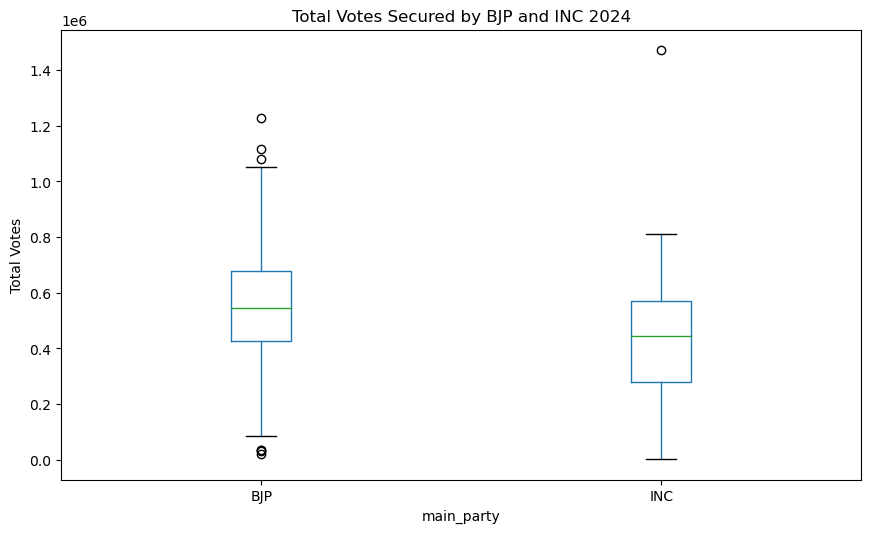

In [173]:
bjp_inc_filtered.boxplot(column = 'total_vote_secured',by ='main_party', figsize = (10,6),grid = False)

plt.title("Total Votes Secured by BJP and INC 2024")
plt.suptitle("") 
plt.ylabel("Total Votes")
plt.xticks([1, 2], ['BJP', 'INC'])
plt.show()

<Axes: >

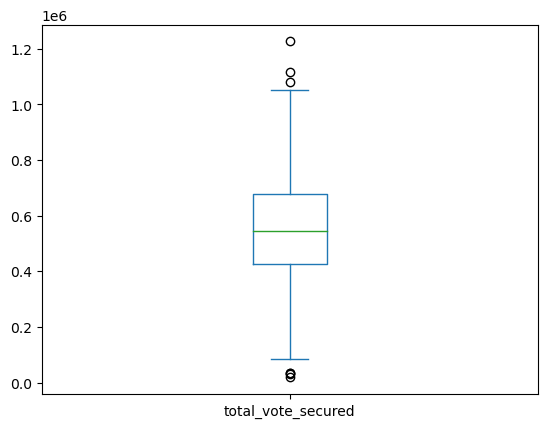

In [159]:
pc_24_v2.loc[pc_24_v2['main_party'] == 'BJP', ['total_vote_secured']].plot(kind = 'box')

In [150]:
#pc_24_v2_merged.to_csv('pc_24_for_sql.csv',index = False,encoding="utf-8")

In [151]:
#pc_19_v1.to_csv('pc_19_for_sql.csv',index = False,encoding="utf-8")